<a href="https://colab.research.google.com/github/ViditPy/Predicting-Heart-Disease-Using-Machine-Learning/blob/master/Predicting_Heart_Disease_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEART DISEASE PREDICTION(KAGGLE DATASET)
In this machine learning project I have collected the data from Kaggle(https://www.kaggle.com/johnsmith88/heart-disease-dataset) and I will be using Machine Learning to Predict weather any Person is suffering from Heart Disease


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

HERE, We will be experimenting with 3 Algorithms.
1) KNeighboursClassifiers
2) DecisionTree Classifier
3) Random Forest Classifier


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**"FEATURES"** SELECTION

In [ ]:
import seaborn as sns
# get co-relation of each features in DataSet
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(220,230))


<Figure size 15840x16560 with 0 Axes>

<Figure size 15840x16560 with 0 Axes>

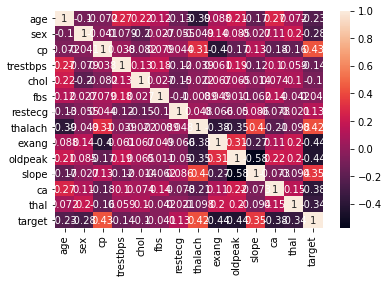

In [ ]:
#plot HeatMap
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6bc0e50f0>,
      dtype=object)

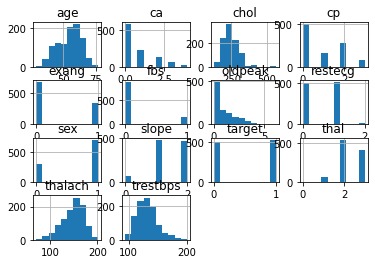

In [ ]:
df.hist()

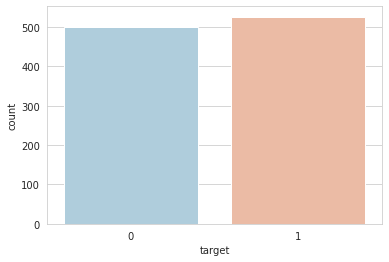

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

**DATA PROCESSING**
After exploring the Dataset,I observed that I need to convert
some categorial variables into dummy variables and scale all the values before trainng the machine learning Models.First I will use the get_dummies method to create the dummy columns to categorial values.

In [ ]:
dataset = pd.get_dummies(df,columns= ['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standardscaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
y = dataset['target']
x = dataset.drop(['target'],axis =1)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,18):
  knn_classifier = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(scores.mean())


In [ ]:
plt.plot([k in range (1,18)],knn_scores,color ='red')
for i in range(1,18):
   plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors= 12)
score = cross_val_score(knn_classifier,x,y,cv=10)
knn_scores.append(scores.mean())

In [ ]:
knn_scores

[0.9941176470588236,
 0.9775366457262518,
 0.9629354654483153,
 0.8975157053112508,
 0.8507138777841234,
 0.8643441842756522,
 0.8331144108128689,
 0.8399866742813631,
 0.8770607272035027,
 0.8604797258709309,
 0.8633923472301543,
 0.864382257757472,
 0.8584903864458404,
 0.8506758043023035,
 0.8487340567294879,
 0.8438701694269941,
 0.8584808680753854,
 0.8643346659051971,
 0.8623833999619265,
 0.8623833999619265]

In [ ]:
score.mean()

0.864382257757472

**RANDOM FOREST CLASSIFIER
**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)

In [ ]:
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.864382257757472

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400